In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# V1

In [ ]:
exp_1_five_walking_over = pd.read_json("v1/5-pushups-walking-over.json")
exp_2_six_distance = pd.read_json("v1/6-pushups-slightler-larger-distance.json")
exp_3_no_pushups = pd.read_json("v1/no-pushups.json")
exp_4_side = pd.read_json("v1/6-pushups-side-view.json")

In [4]:
def landmark(exp, name): 
    return exp[name].apply(pd.Series)

def pos(landmark, posType): 
    return landmark[posType].apply(pd.Series)
    

def graph_landmark(exp, landmark_name): 
    x = landmark(exp, landmark_name)
    normalized = pos(x, 'normalizedPosition')
    original = pos(x, 'originalPosition')

    normalized.plot(title=f"{landmark_name}: normalized")
    original.plot(title=f"{landmark_name}: original")
    
def graph_out(exp, name): 
    print(f'====================== {name} =====================')
    graph_landmark(exp, "leftShoulder")
    graph_landmark(exp, "rightShoulder")
    graph_landmark(exp, "nose")

====================== Experiment 1: 5 pushups walking over =====================


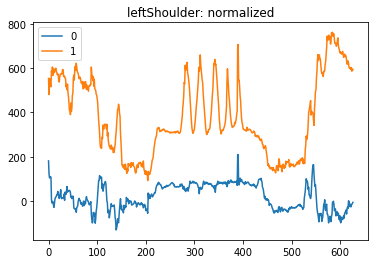

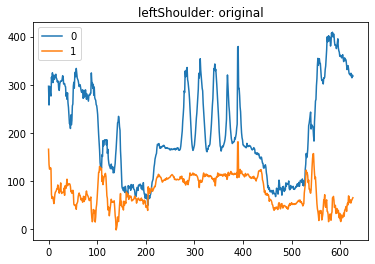

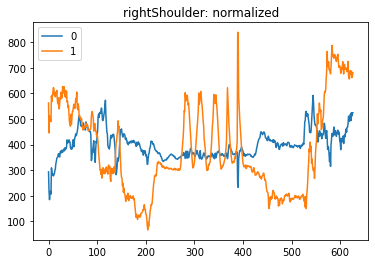

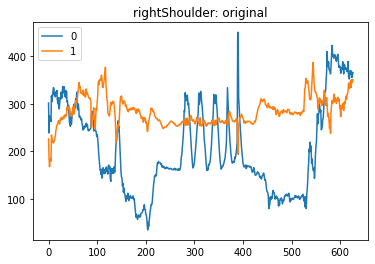

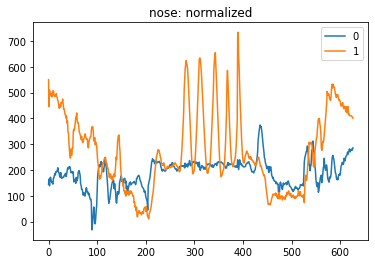

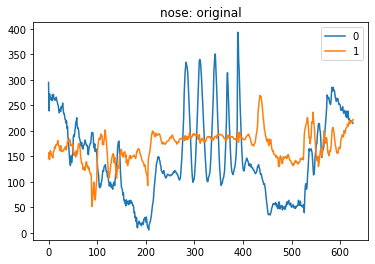

In [5]:
graph_out(exp_1_five_walking_over, "Experiment 1: 5 pushups walking over")

====================== Experiment 2: 6 pushups at a slight distance =====================


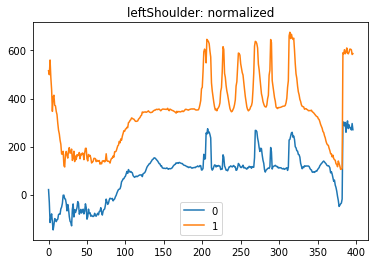

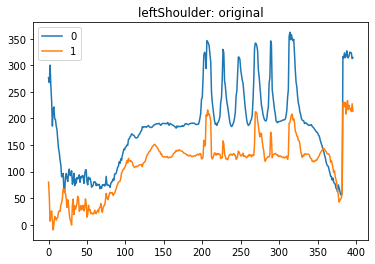

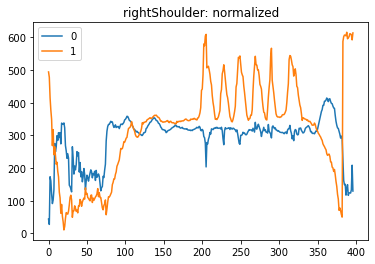

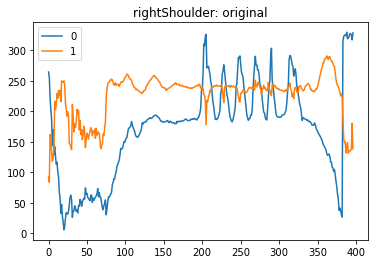

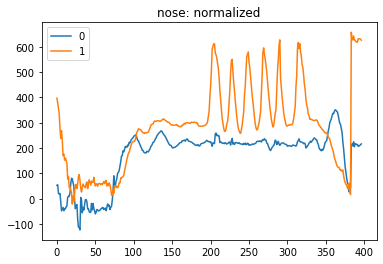

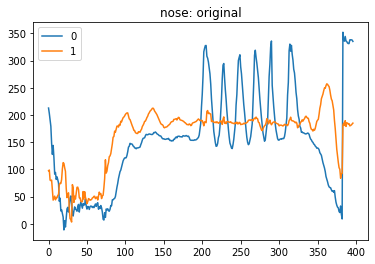

In [6]:
graph_out(exp_2_six_distance, "Experiment 2: 6 pushups at a slight distance")

====================== Experiment 3: No pushups =====================


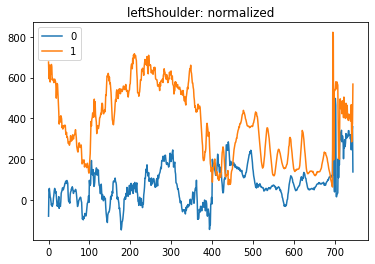

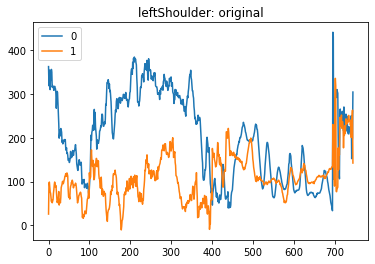

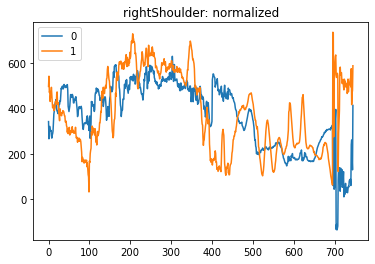

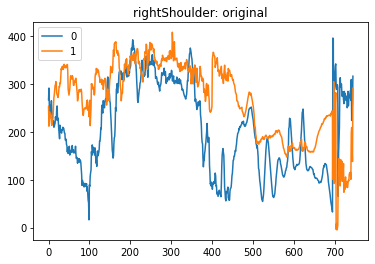

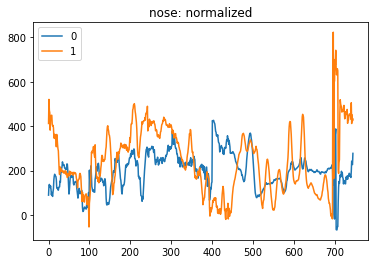

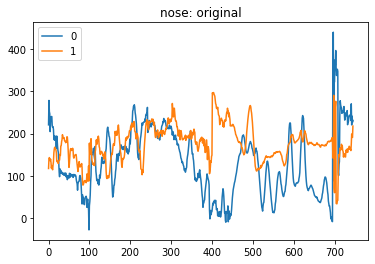

In [7]:
graph_out(exp_3_no_pushups, "Experiment 3: No pushups")

====================== Experiment 4: side =====================


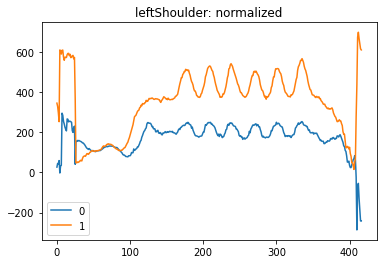

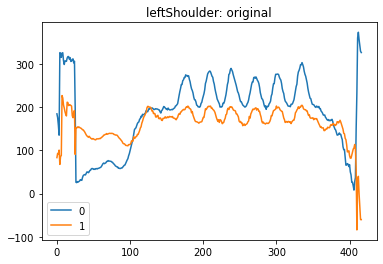

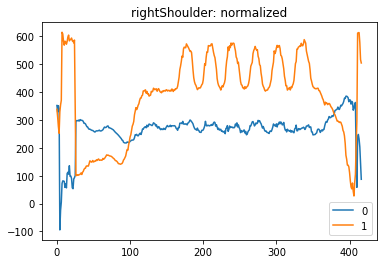

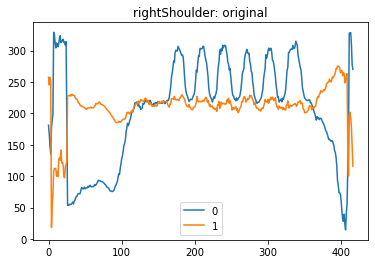

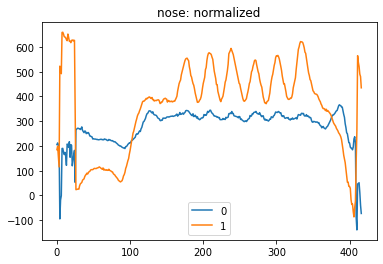

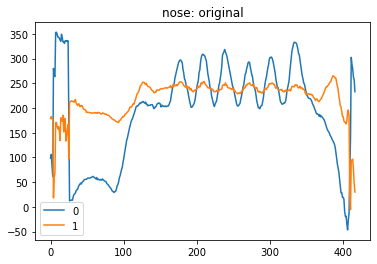

In [8]:
graph_out(exp_4_side, "Experiment 4: side")

<Figure size 432x288 with 0 Axes>

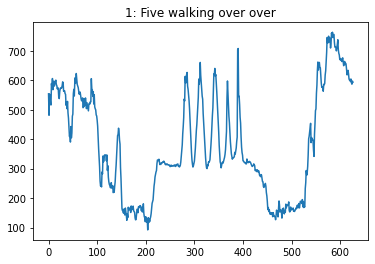

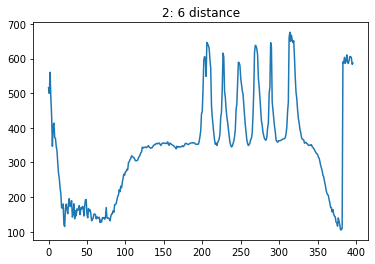

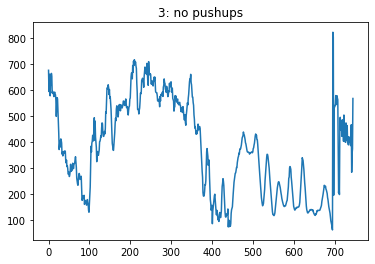

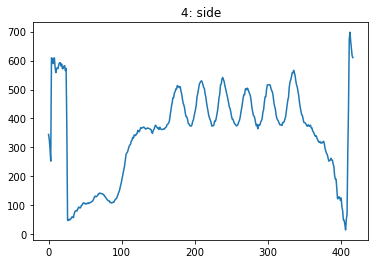

<Figure size 432x288 with 0 Axes>

In [9]:
def get_y_data(exp): 
    return pos(landmark(exp, 'leftShoulder'), 'normalizedPosition')[1]

exp_1_y_five_walking_over = get_y_data(exp_1_five_walking_over)
exp_2_y_six_distance = get_y_data(exp_2_six_distance)
exp_3_y_no_pushups = get_y_data(exp_3_no_pushups)
exp_4_y_side = get_y_data(exp_4_side)

exp_1_y_five_walking_over.plot(title="1: Five walking over over")
plt.figure()
exp_2_y_six_distance.plot(title="2: 6 distance")
plt.figure()
exp_3_y_no_pushups.plot(title="3: no pushups")
plt.figure()
exp_4_y_side.plot(title="4: side")
plt.figure()

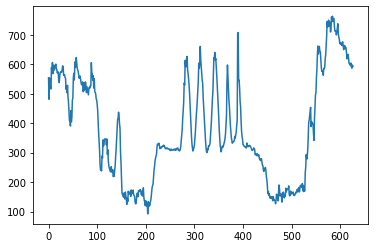

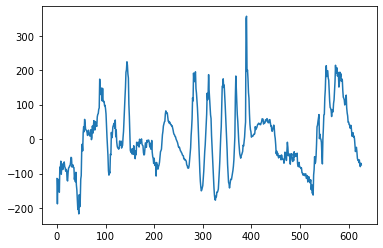

In [10]:
# Play with fourier transform

exp_1_y_five_walking_over 
exp_2_y_six_distance
exp_3_y_no_pushups
exp_4_y_side

f = exp_1_y_five_walking_over
n = f.shape[-1]
fhat = np.fft.fft(f, n) # compute fft
PSD = fhat * np.conj(fhat) / n # pwer spectrum
freq = np.fft.fftfreq(n) # x axis of freqs

L = np.arange(1, np.floor(n /2), dtype='int') # first half


indices = PSD < 1000000
PSDClean = PSD * indices
fhat = fhat * indices
ffilt = np.fft.ifft(fhat)

exp_1_y_five_walking_over.plot()
plt.show()

pd.Series(ffilt.real).plot()

In [11]:
# hmm some other ways: 

exp_1_y_five_walking_over 
exp_2_y_six_distance
exp_3_y_no_pushups
exp_4_y_side

def pushup_play(exp):
    x = pos(landmark(exp, 'leftShoulder'), 'normalizedPosition')[0] 
    y = pos(landmark(exp, 'leftShoulder'), 'normalizedPosition')[1] 

    y = pd.Series(np.diff(y))

pushup_play(exp_1_five_walking_over)

# V2

In [18]:
exp_5_8_distance_front = pd.read_json("v2/8-distance-front.json")
exp_6_6_close_front = pd.read_json("v2/6-close-front.json")
exp_7_7_distance_side = pd.read_json("v2/7-distance-side.json")

In [130]:
def normalized_pos(exp, landmark_name): 
    return pos(landmark(exp, landmark_name), 'normalizedPosition')

def exp_degs(exp):     
    left_elbow = normalized_pos(exp, 'leftElbow')
    left_shoulder = normalized_pos(exp, 'leftShoulder')
    left_wrist = normalized_pos(exp, 'leftWrist')


    last_landmark = left_elbow
    mid_landmark = left_shoulder 
    first_landmark = left_wrist

    last_mid = np.arctan2(last_landmark[1] - mid_landmark[1], last_landmark[0] - mid_landmark[0])
    first_mid = np.arctan2(first_landmark[1] - mid_landmark[1], first_landmark[0] - mid_landmark[0])
    radians = last_mid - first_mid

    degs = radians * 180 / np.pi
    
    return pd.Series(degs)
    
def graph_all_pos(exp): 
    left_shoulder = normalized_pos(exp, 'leftShoulder')
    left_hip = normalized_pos(exp, 'leftHip')
    left_elbow = normalized_pos(exp, 'leftElbow')
    nose = normalized_pos(exp, 'nose')
    degs = exp_degs(exp)
    
    left_shoulder[1].plot()
    left_hip[1].plot()
    left_elbow[1].plot()
    nose[1].plot()
    
    plt.show()

    left_shoulder[0].plot()
    left_hip[0].plot()
    left_elbow[0].plot()
    nose[0].plot()
    
    plt.show()

    degs.plot()
    
    

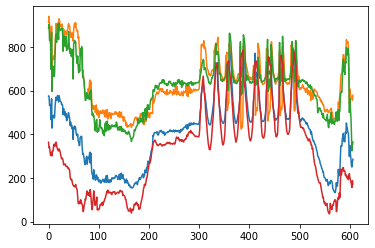

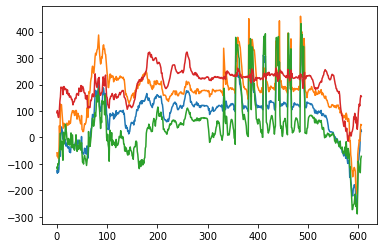

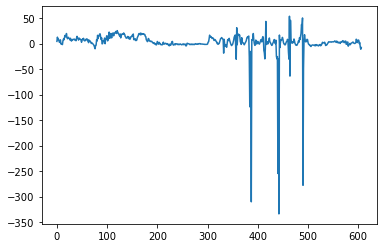

In [131]:
graph_all_pos(exp_5_8_distance_front)

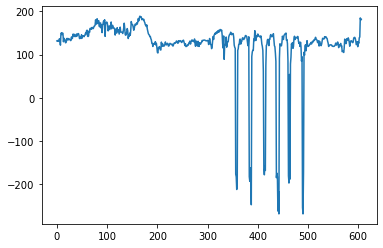

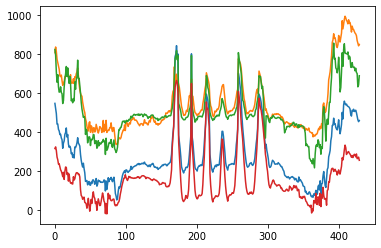

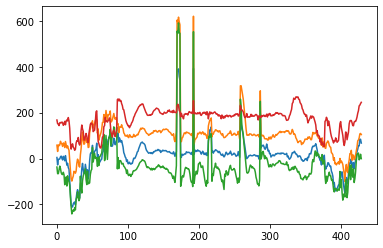

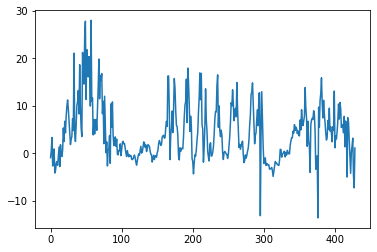

In [96]:
graph_all_pos(exp_6_6_close_front)

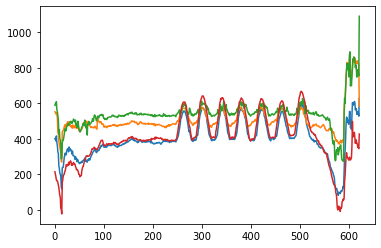

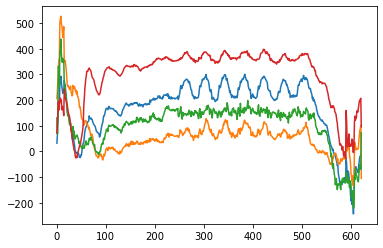

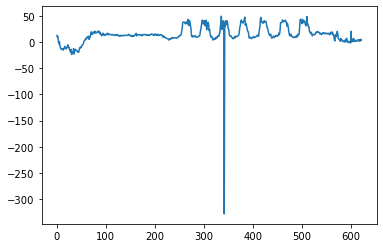

In [97]:
graph_all_pos(exp_7_7_distance_side)

In [98]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# can I "smooth" these somehow? 

- Maybe I can _just_ focus on a frontal view
- In this case, the nose is a good predictor, but I'm not sure what the the best method would be

In [100]:
from sklearn import svm


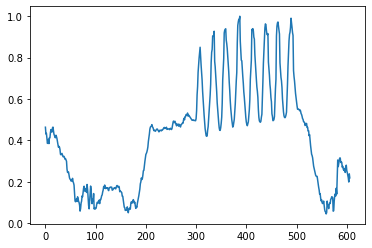

In [132]:
exp = exp_5_8_distance_front
nose = normalized_pos(exp, 'nose')
nose_y = nose[1]
nose_y /= max(nose_y)
nose_y.plot()